# ANOVA

### by

## Jeff Gross


based on SAS e-learning

## Graphical Analysis of Associations

<img src="files/twosample.png">

<img src="files/ANOVA.png">

<img src="files/ANOVA_flowchart.png">

<img src="files/boxplot_1.png">

In [2]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

### Assumptions for Two-Sample t-Test
#### 1.independent observations (random representative sample & data collected correctly-this assumption-True)
#### 2.normality
#### 3.homogeneity of variance (use F-test to formalize this assumption)

<img src="files/F_test.png">

<img src="files/F_test_1.png">

<img src="files/F_test_2.png">

<img src="files/F_test_3.png">

## Using PROC TTEST to Compare Means

### Task:  Determine the effectiveness of a new type of foreign language teaching technique on student grammar skills. 

### Result: 
#### Normality: Data normal based on histogram plot, prob plot, skewness, and kurtosis. 
#### Equal variance: Data has equal variance based on p-value  of .066 > .05 failure to reject null hypothesis of variances being equal.
#### Using Pooled test, p-value of .1788 > .05 failure to reject null hypothesis that the means are equal. Therefore, there is not enough evidence to say conclusively that the new teaching technique is better than the old teaching technique.

In [ ]:
title 'Descriptive Statistics Using 
proc univariate data=Statdata.German noprint;
   var Change;
   histogram Change / normal(mu=est sigma=est noprint);
   inset min max skewness kurtosis / position=ne;
   probplot Change / normal(mu=est sigma=est);
   inset min max skewness kurtosis;
run;
title;


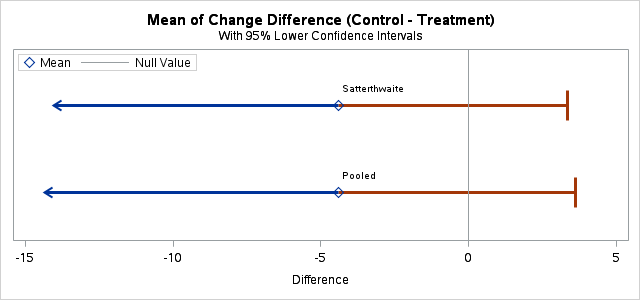

In [4]:
title "One—Sided t—Test Comparing Test Performance with and without teaching technique"; 
title2 'One-Sided t-Test';
proc ttest data=Statdata.German plots (only shownull)=interval h0=0 sides=L; 
    class Group; 
    var Change; 
run; 
title;

## One Way ANOVA

### one-way ANOVA = two-sample t-test
### F statistic = t statistic^2


<img src="files/ANOVA_1.png">

<img src="files/ANOVA_2.png">

<img src="files/ANOVA_3.png">

### SSM+SSE=SST

#### SSM: variability explained by the type of medication (you want larger piece of total to be represented by what you can explain versus what you can't explain)
#### SSE: variability not explained by the type of medication

<img src="files/SS.png">

### Assumptions:

#### 1.Independent observations (do you have a good random sample?)
#### 2.error terms are normally distributed (are residuals normal?)
#### 3.error terms have equal variances across treatments (Levene's test: if p>.05 then fail to reject null hypothesis of equal variances)

### Task:  Are the average sales significantly different for 4 advertising types:  local newspaper ads, local radio ads, in-store salespeople, and in-store displays.

### Result:
#### BoxPlot: In-store display mean is lower than the others. In-store display has a positive outlier, and local radio has outliers in both directions.
#### Normality: The histogram and Q-Q plot both show that the residuals seem normally distributed.
#### Homogeneity of Variance: The Levene's Test for Homogeneity of Variance shows a p-value greater than alpha. Therefore, you do not reject the hypothesis of homogeneity of variances or equal variances across advertising types. The overall F-value from the analysis of variance table is associated with a p value less than or equal to .0001.
#### Conclusion:  At least one treatment mean is different from one other treatment mean. At this point, it is not known which means are significantly different.


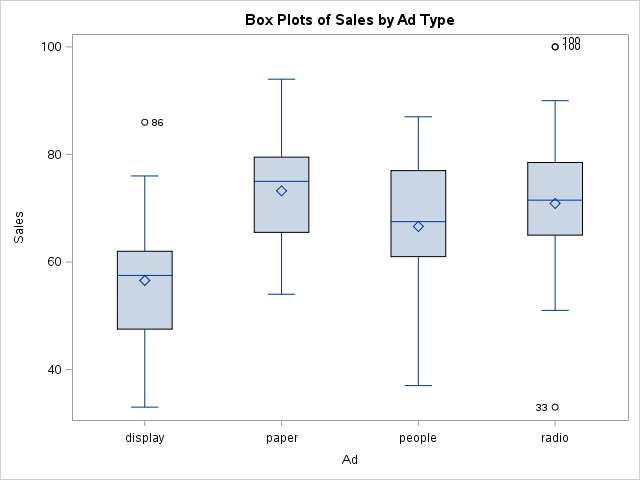
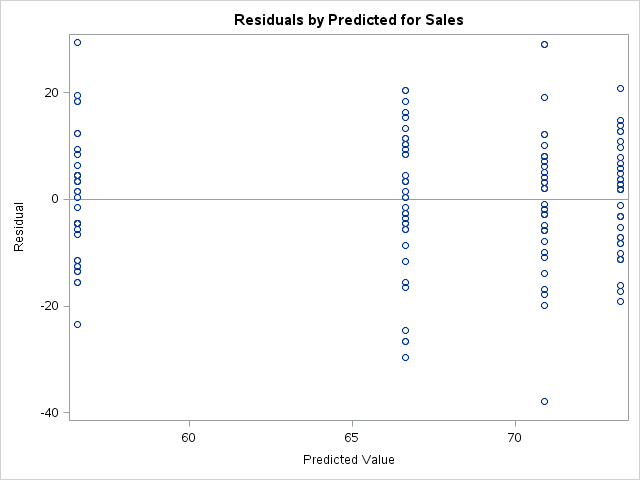
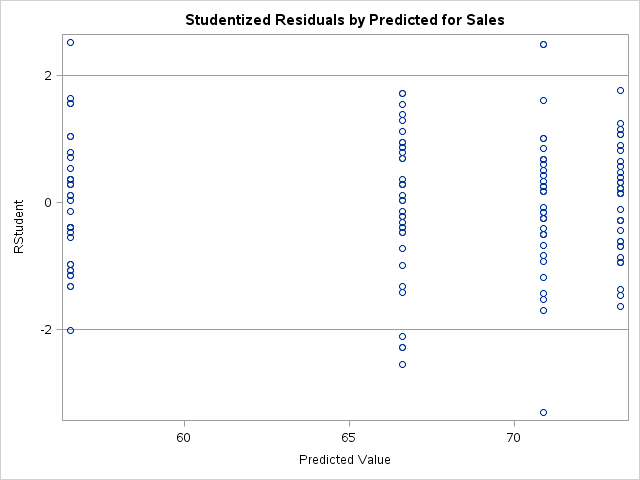
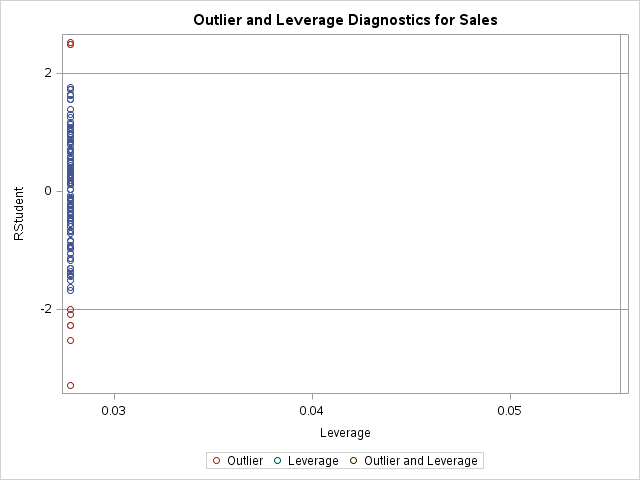
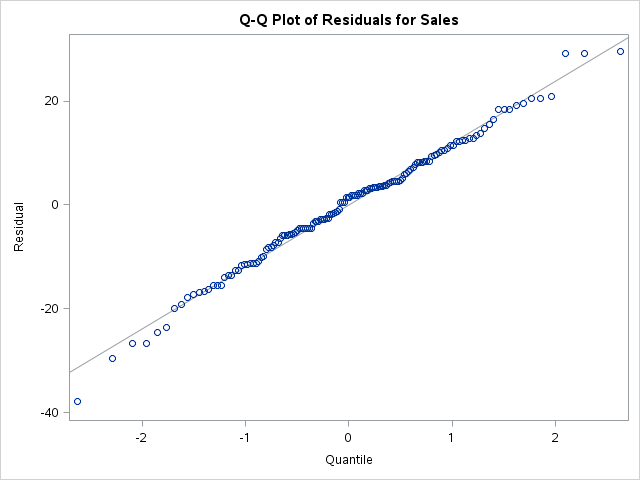
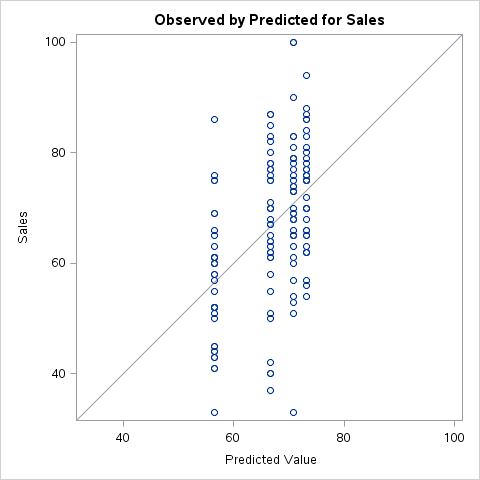
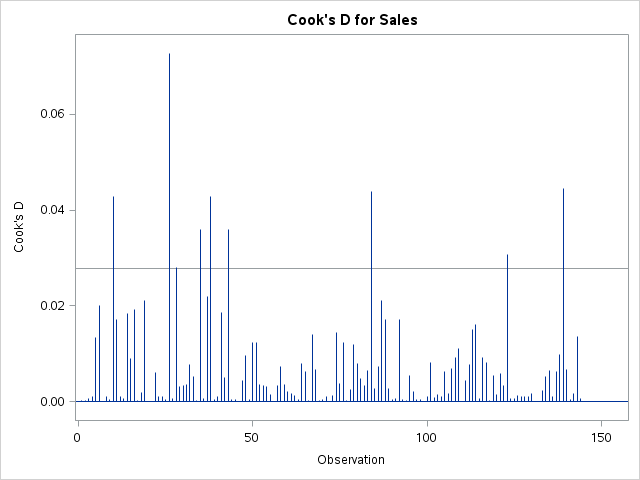
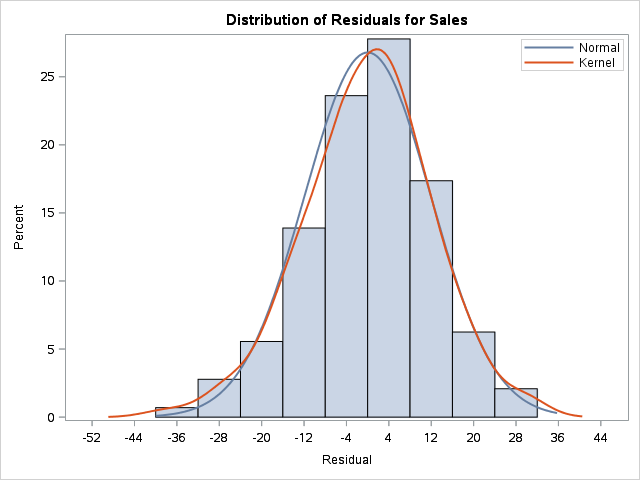
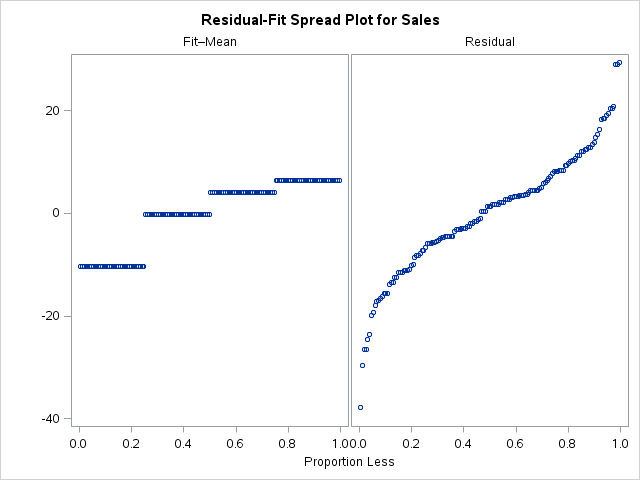

In [5]:
proc means data=statdata.ads printalltypes n mean 
           std skewness kurtosis;
   var Sales;
   class Ad;
   title 'Descriptive Statistics of Sales by Ad Type';
run;

proc sgplot data=statdata.ads;
   vbox Sales / category=Ad datalabel=Sales;
   title 'Box Plots of Sales by Ad Type';
run;
title;

proc glm data=statdata.ads plots(only)=diagnostics(unpack);
   class Ad;
   model Sales=Ad;
   means Ad / hovtest;
   title 'Testing for Equality of Ad Type on Sales';
run;
quit;
title;

## ANOVA with Data from a Randomized Block Design

### Levene's test for Homogeneity (equal variance) only for one way ANOVA
### If F factor>1, then it helped to add the blocking factor to the model.  Add the blocking factor helped to decrease the unexplained variability of the response.

<img src="files/rand_block.png">

### Task: Were the average sales were significantly different for four advertising types:  local newspaper ads, local radio ads, in-store salespeople, and in-store displays in 36 locations across the U.S.?

### Result: 
#### Normality: The Q-Q Plot of Residuals indicates that the normality assumption for ANOVA is met. 
#### The p-value for Ad (<.0001) indicates that there was some difference in sales among the advertising campaign types when controlling for Area. 
#### The large (statistically significant) F-value for Area gives evidence that the area of the country was a useful factor on which to block. It explains a significant amount of the variability, and helps improve the model.


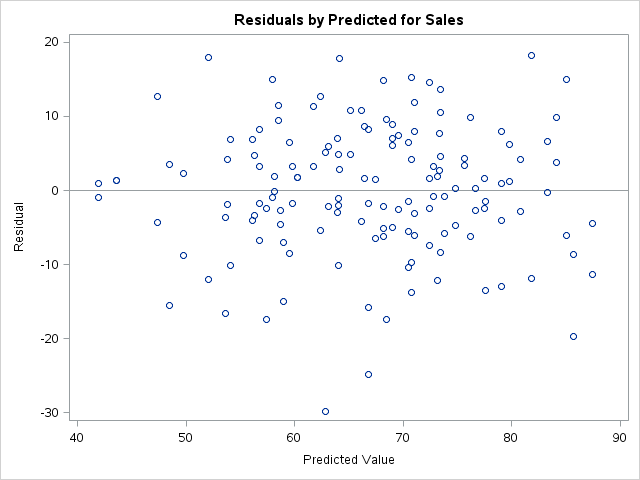
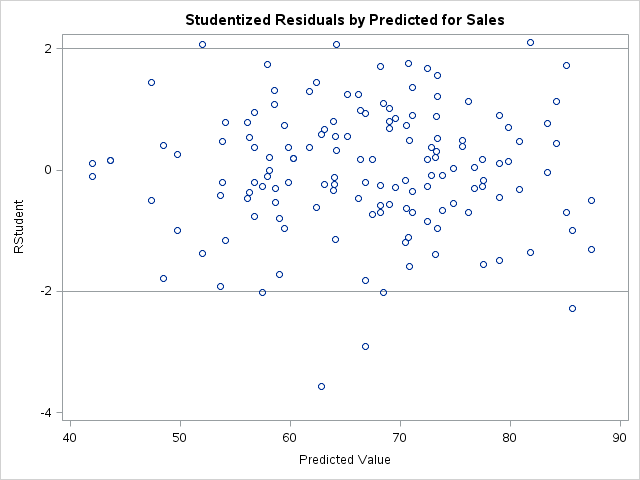
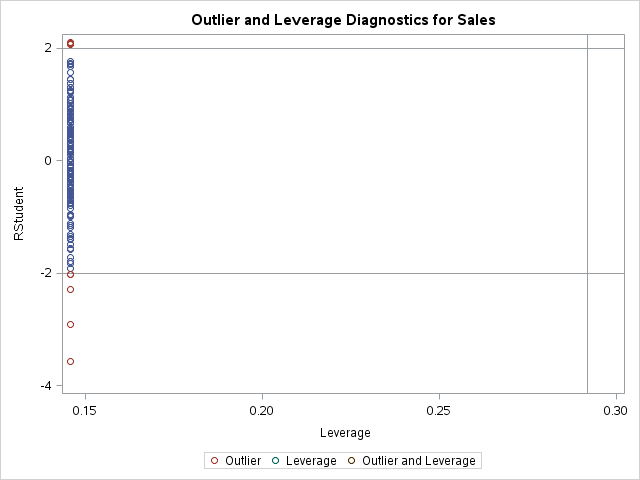
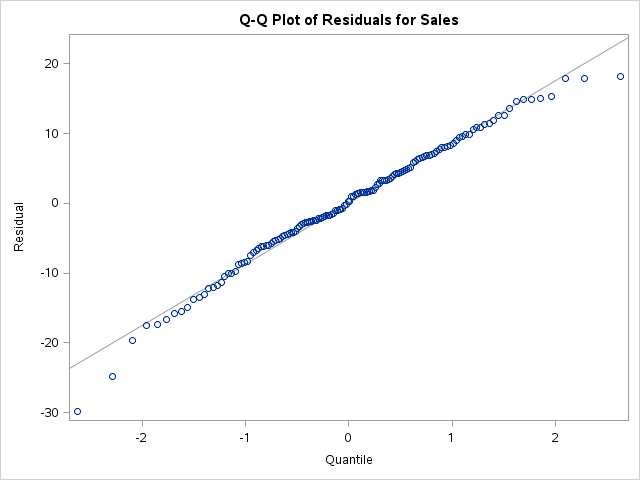
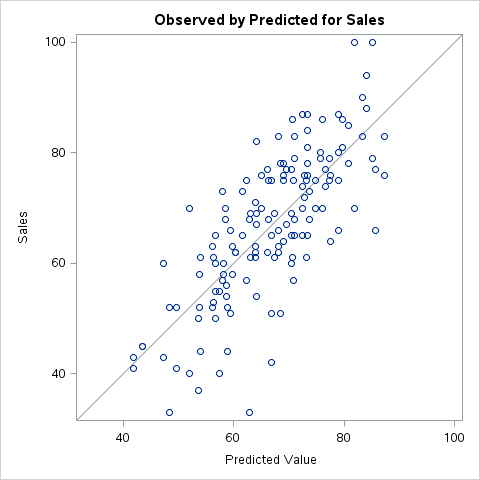
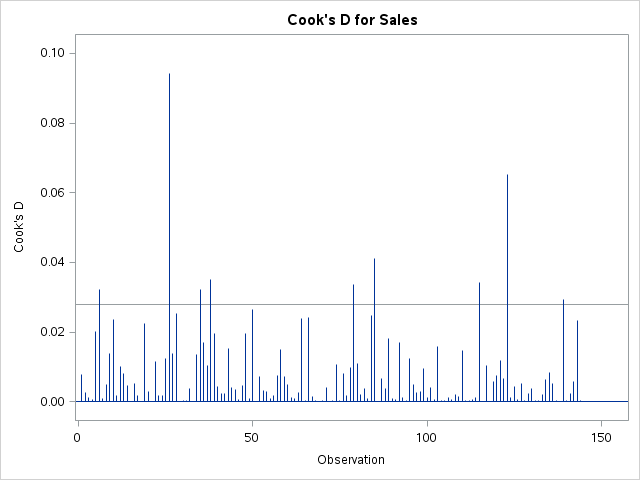
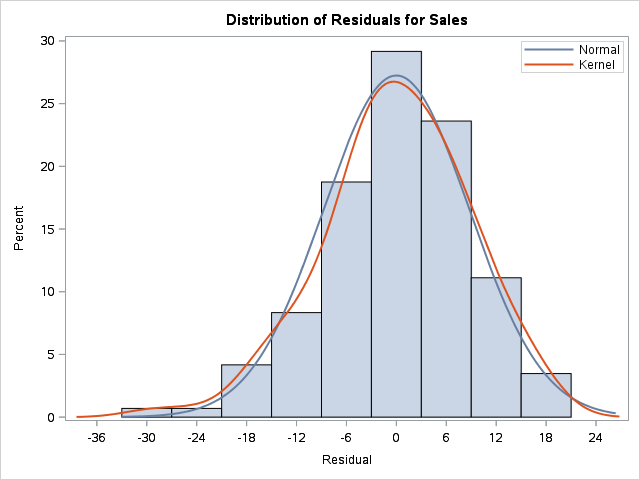
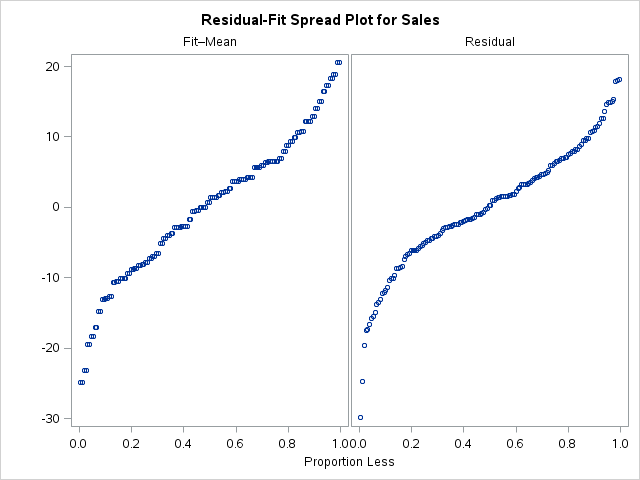

In [7]:
title 'ANOVA for Randomized Block Design';
proc glm data=statdata.ads1 plots(only)=diagnostics(unpack);
   class Ad Area;
   model Sales=Ad Area;
run;
quit;
title;

## ANOVA Post Hoc Tests

### The probability that you conclude a difference exists at least one time when there really isn't a difference increases with the more tests you perform.  The chance of making a type I error increasing each time you perform a statistical test. 

<img src="files/post_hoc.png">

<img src="files/EER.png">

### CER is the probability of a Type I Error on a single pairwise t-test.

### EER is the probability of making at least one Type I error when performing a whole set of comparisons.  It takes into consideration the number of comparisons, so it increases as the number of tests increase.

### Controls the EER:

#### The Tukey method (Honestly Significant Test) -only for pairwise comparisons
#### Dunnett's Method-Control vs Other Treatments-

### Task: Perform a post hoc test and look at the individual differences among means for the advertising types.

### Result: 
#### Tukey: The Tukey comparisons show significant differences between Display and all other types of advertising, and between Paper and People (p=0.0190). 

#### Dunnett: Dunnett's method showed that all other advertising campaigns resulted in significantly better average sales (statistically different) than Display.


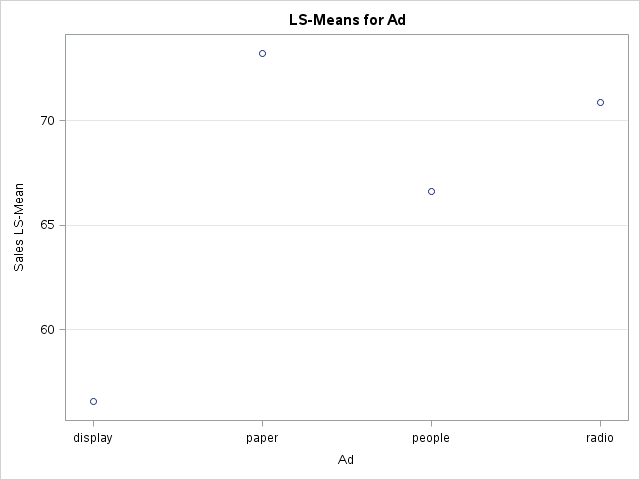
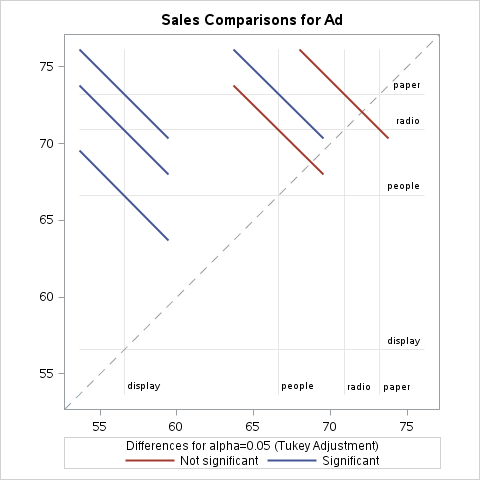
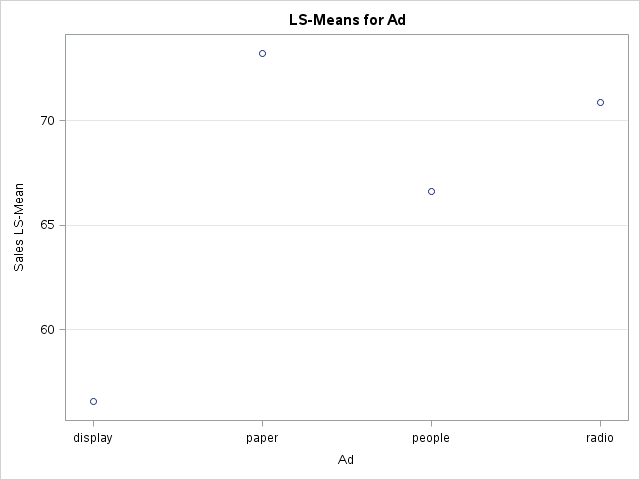
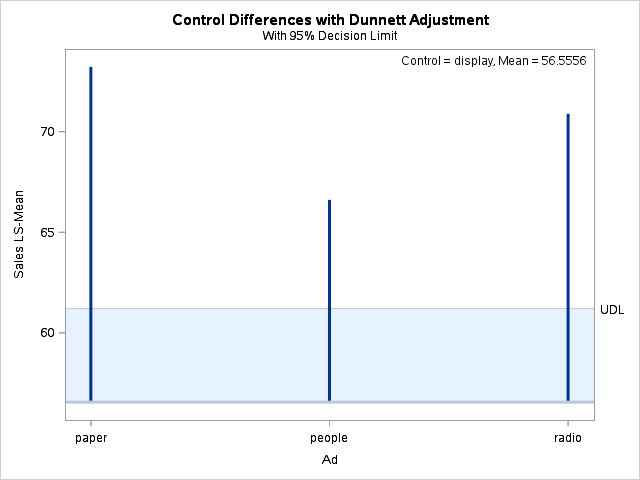

In [9]:
ods select LSMeans Diff MeanPlot DiffPlot ControlPlot;
proc glm data=statdata.ads1;
   class Ad Area;
   model Sales=Ad Area;
   lsmeans Ad / pdiff=all adjust=tukey;
   lsmeans Ad / pdiff=controlu('display') adjust=dunnett;
   title 'Pairwise Differences for Ad Types on Sales';
run;
quit;
title;

## Two-Way ANOVA with Interactions

### n-way ANOVA: n number of predictor variables

<img src="files/interact.png">

<img src="files/two_way.png">

<img src="files/interact_1.png">

<img src="files/interact_2.png">

<img src="files/store_out.png">

<img src="files/proc_plm.png">

<img src="files/proc_plm.png">

### Task: Consider an experiment to test three different brands of concrete to determine whether an additive makes the cement in the concrete stronger.

### Result:
#### Interaction term between Additive and Brand of Concrete:
The difference between reinforced and standard means for Graystone is about -5.38, whereas the mean difference for Consolidated is -3.2 and for EZ Mix is -2.86. Therefore, it appears that the difference between concretes using standard and reinforced cements differs by brand. In other words, it appears that there is an interaction between the Additive and the Brand of concrete. That means that an interaction term in the ANOVA model would be appropriate to assess the statistical significance of the interaction.

There is no significant interaction between Additive and Brand, p-value (.4682) > .05, even though the plot shows slightly different slopes among the three brands of concrete. The interaction term can be removed, and if the additive type is significant, it can be concluded that there is a difference in additive types.

#### Additive versus Standard Concrete
The test for Additive is still significant. There is a difference between standard and reinforced. The estimate of the two least squares means is found in the results for Least Suares means in the analysis the Effects of Additive and Brand
on Concrete Strength without Interaction. A reinforced additive in the concrete seems to add more strength than a standard additive does. The mean difference is about 3.8.


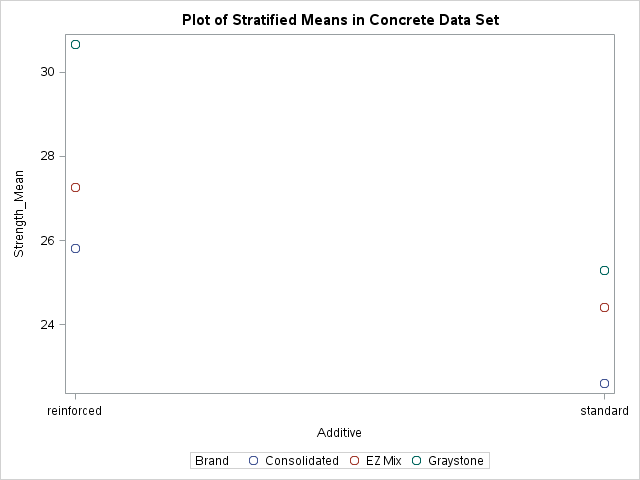
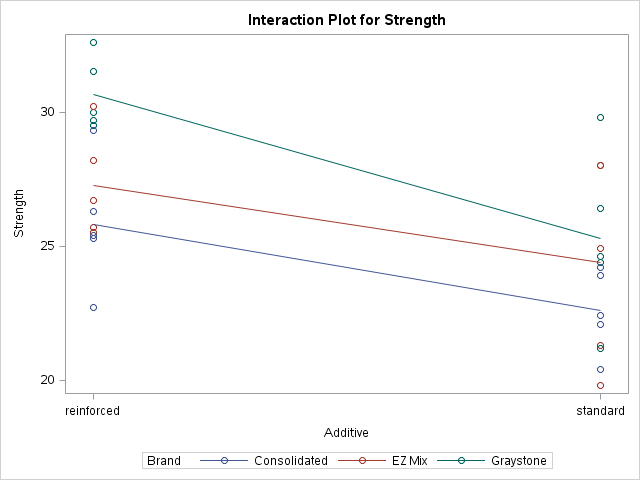
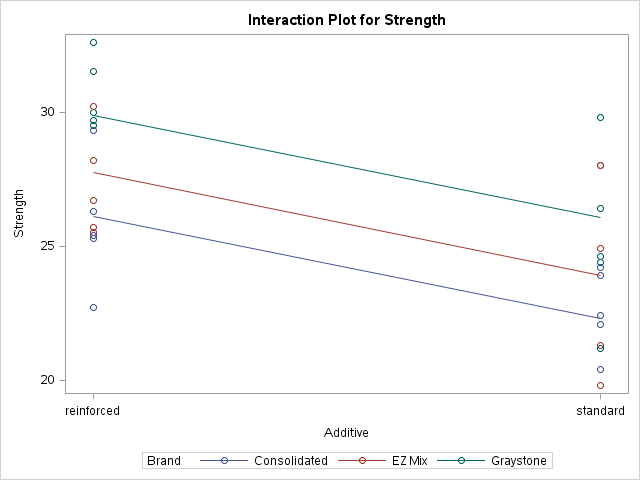
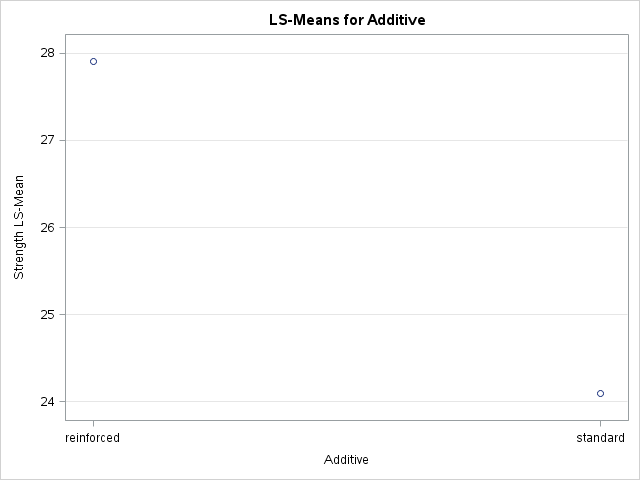

In [3]:
proc means data=statdata.concrete mean var std printalltypes;
   class Brand Additive;
   var Strength;
   output out=means mean=Strength_Mean;
   title 'Selected Descriptive Statistics for Concrete Data Set';
run;

proc sgplot data=means;
   where _TYPE_=3;
   scatter x=Additive y=Strength_Mean / group=Brand 
           markerattrs=(size=10);
   xaxis integer;
   title 'Plot of Stratified Means in Concrete Data Set';
run;
title;

proc glm data=statdata.concrete;
   class Additive Brand;
   model Strength=Additive Brand Additive*Brand;
   title 'Analyze the Effects of Additive and Brand';
   title2 'on Concrete Strength';
run;
quit;
title;

proc glm data=statdata.concrete;
   class Additive Brand;
   model Strength=Additive Brand;
   lsmeans Additive;
   title 'Analyze the Effects of Additive and Brand';
   title2 'on Concrete Strength without Interaction';
run;
quit;
title;

<img src="files/rand_block_1.png">